# Olimov Amir

## О наборе данных
Этот набор данных включает данные для оценки уровня ожирения у людей из стран Мексики, Перу и Колумбии на основе их привычек питания и физического состояния.
Данные содержат 17 атрибутов и 2111 записей, записи помечены переменной класса NObesity (уровень ожирения), что позволяет классифицировать данные с использованием значений: 
Недостаточный вес (0 - Insufficient Weight), Нормальный вес (1 - Normal Weight), Избыточный вес I уровня (2 - Overweight Level I), Избыточный вес II уровня (3 - Overweight Level II), Ожирение I типа (4 - Obesity Type I), Ожирение II типа (5 - Obesity Type II) и Ожирение III типа (6 - Obesity Type III).

### Подробности данных:
- Gender: Пол
- Age: Возраст
- Height: в метрах
- Weight: в кг
- family_history : Страдал ли кто-либо из членов семьи от избыточного веса?
- FAVC: Часто ли вы едите высококалорийную пищу?
- FCVC: Вы обычно едите овощи?
- NCP: Сколько основных приемов пищи у вас в день?
- CAEC: Вы едите что-нибудь между приемами пищи?
- SMOKE: Вы курите?
- CH2O: Сколько воды вы пьете ежедневно?
- SCC: Вы следите за количеством потребляемых ежедневно калорий?
- FAF: Как часто вы занимаетесь физической активностью?
- TUE: Сколько времени вы используете технологические устройства, такие как мобильный телефон, видеоигры, телевизор, компьютер и т. д.?
- CALC: Как часто вы употребляете алкоголь?
- MTRANS: Какой транспорт вы обычно используете?
- Obesity_level (Целевой столбец): Уровень ожирения

## Target >>> Obesity

```
print(data.info())
print(data.shape)
print(data.isna().sum())
print(data.nunique())
print(data["Obesity"].unique())
print(data.describe())
print(data.columns)

### yes - 1, no - 0 
### Male - 1, Female - 0

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

```
metrics_model = pd.DataFrame({'Metric': ['Accuracy', 'Cross Validation Mean', 'ROC AUC', 'Precision', 'Recall', 'F1 Score']})
def evaluate_metrics(model, model_name):
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    cv_scores = cross_val_score(model, X, y, cv=5)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    precision = precision_score(y_test, model.predict(X_test), average='macro')
    recall = recall_score(y_test, model.predict(X_test), average='macro')
    f1 = f1_score(y_test, model.predict(X_test), average='macro')
    metrics_model[model_name] = [test_accuracy, cv_scores.mean(), roc_auc, precision, recall, f1]

In [16]:
data = pd.read_csv("Obesity prediction.csv")
data

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [17]:
data.drop(columns=["Weight", "SMOKE"], inplace=True)
col = ["family_history", "FAVC",  "SCC"] #у них бинарные значения: yes, no
data[col] = data[col].replace({'yes': 1, 'no': 0})
data["Gender"] = data["Gender"].replace({'Male': 1, 'Female': 0})
data["Obesity"] = data["Obesity"].replace({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3,
                                          'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})
data_copy = data.copy()
data_copy

,Gender,Age,Height,family_history,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.000000,1.620000,1,0,2.0,3.0,Sometimes,2.000000,0,0.000000,1.000000,no,Public_Transportation,1
1,0,21.000000,1.520000,1,0,3.0,3.0,Sometimes,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,1
2,1,23.000000,1.800000,1,0,2.0,3.0,Sometimes,2.000000,0,2.000000,1.000000,Frequently,Public_Transportation,1
3,1,27.000000,1.800000,0,0,3.0,3.0,Sometimes,2.000000,0,2.000000,0.000000,Frequently,Walking,2
4,1,22.000000,1.780000,0,0,2.0,1.0,Sometimes,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,1,1,3.0,3.0,Sometimes,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,6
2107,0,21.982942,1.748584,1,1,3.0,3.0,Sometimes,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,6
2108,0,22.524036,1.752206,1,1,3.0,3.0,Sometimes,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,6
2109,0,24.361936,1.739450,1,1,3.0,3.0,Sometimes,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,6


In [18]:
metrics_model = pd.DataFrame({'Metric': ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train Precision', 'Test Precision', 
                                         'Train Recall', 'Test Recall', 'Train F1 Score', 'Test F1 Score', 'Cross Validation Mean']})

def evaluate_metrics(model, model_name):
    # Кросс-валидация
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)
    # train
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_proba, multi_class='ovr')
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    # test
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    metrics_model[model_name] = [train_accuracy, test_accuracy, train_roc_auc, test_roc_auc, train_precision, test_precision, 
                                 train_recall, test_recall, train_f1, test_f1, cv_scores.mean()]


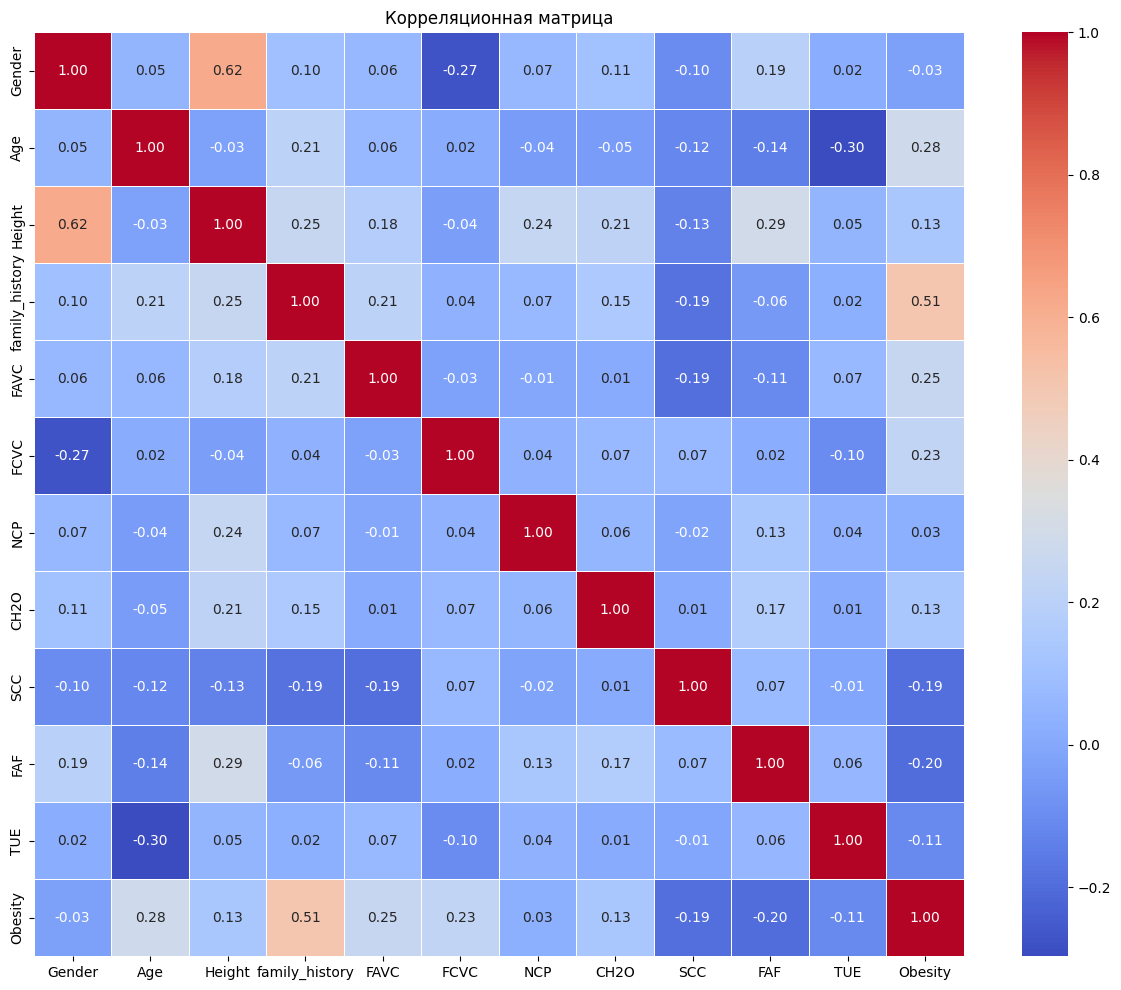

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(data.select_dtypes(include=["number"]).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

# OneHotEncoder

In [6]:
ohe = OneHotEncoder()
data = data_copy
cat_f = data.select_dtypes(include="object").columns # 'CAEC', 'CALC', 'MTRANS'
data_cat_to_num = pd.get_dummies(data[cat_f]).astype(int)
data1 = data.select_dtypes(include=["number"])
data = pd.concat([data.select_dtypes(include=["number"]), data_cat_to_num], axis=1)
X = data.drop(columns=["Obesity"])
y = data["Obesity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
evaluate_metrics(RFC, 'RandomForest ohe')
metrics_model

,Metric,RandomForest ohe
0,Train Accuracy,1.000000
1,Test Accuracy,0.859848
2,Train ROC AUC,1.000000
3,Test ROC AUC,0.977341
4,Train Precision,1.000000
5,Test Precision,0.858705
6,Train Recall,1.000000
7,Test Recall,0.858310
8,Train F1 Score,1.000000
9,Test F1 Score,0.856816


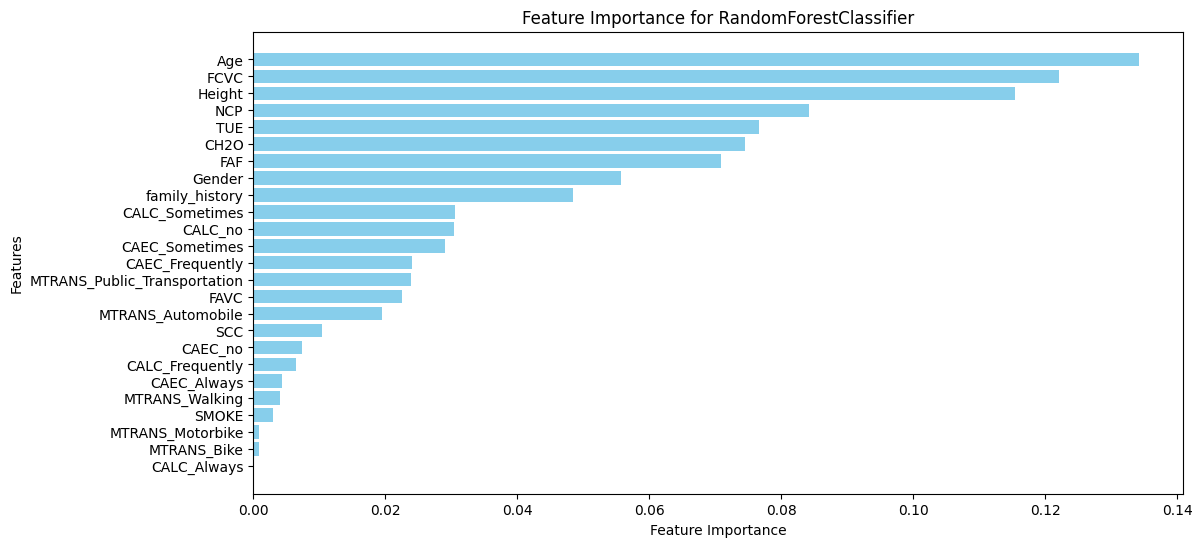

In [8]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': RFC.feature_importances_}).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for RandomForestClassifier')
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
evaluate_metrics(log_reg, 'LogisticRegression le')
metrics_model

,Metric,RandomForest ohe,LogisticRegression le
0,Train Accuracy,1.000000,0.622868
1,Test Accuracy,0.859848,0.607955
2,Train ROC AUC,1.000000,0.902423
3,Test ROC AUC,0.977341,0.880394
4,Train Precision,1.000000,0.625824
5,Test Precision,0.858705,0.598267
6,Train Recall,1.000000,0.617213
7,Test Recall,0.858310,0.597448
8,Train F1 Score,1.000000,0.606595
9,Test F1 Score,0.856816,0.585045


# LabelEncoder

In [21]:
le = LabelEncoder()
data = data_copy
cat_f = data.select_dtypes(include="object").columns # 'CAEC', 'CALC', 'MTRANS'
for col in cat_f:
    data[col] = le.fit_transform(data[col])

X = data.drop(columns=["Obesity"])
y = data["Obesity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
RFC = RandomForestClassifier(
    n_estimators=100,        # Количество деревьев
    max_depth=8,            # Ограничение глубины
    max_features='sqrt',     # Количество признаков при разбиении
    min_samples_leaf=5,      # Минимальное число объектов в листе
    max_samples=0.8,         # Доля выборки для каждого дерева
    random_state=10
)
RFC.fit(X_train, y_train)
evaluate_metrics(RFC, 'RandomForestClassifier le')
metrics_model

,Metric,RandomForestClassifier le
0,Train Accuracy,0.873658
1,Test Accuracy,0.814394
2,Train ROC AUC,0.988514
3,Test ROC AUC,0.964647
4,Train Precision,0.885945
5,Test Precision,0.827324
6,Train Recall,0.870613
7,Test Recall,0.811724
8,Train F1 Score,0.873282
9,Test F1 Score,0.808868


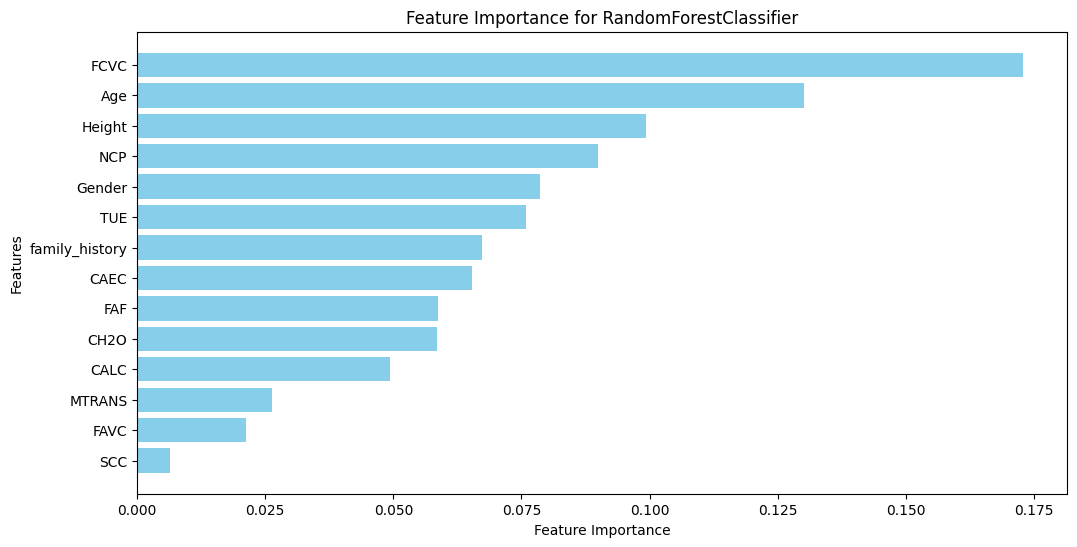

In [23]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': RFC.feature_importances_}).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for RandomForestClassifier')
plt.show()

# TargetEncoder

In [13]:
te = TargetEncoder()
X = data.drop(columns=["Obesity"])
y = data["Obesity"]
cat_f = data.drop(columns=["Obesity"]).select_dtypes(include="object").columns 
X[cat_f] = te.fit_transform(X[cat_f], y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

evaluate_metrics(RFC, 'RandomForestClassifier tme')
metrics_model

,Metric,RandomForest ohe,LogisticRegression le,RandomForestClassifier le,RandomForestClassifier tme
0,Train Accuracy,1.000000,0.622868,0.873658,1.000000
1,Test Accuracy,0.859848,0.607955,0.793561,0.876894
2,Train ROC AUC,1.000000,0.902423,0.988026,1.000000
3,Test ROC AUC,0.977341,0.880394,0.961045,0.982453
4,Train Precision,1.000000,0.625824,0.886114,1.000000
5,Test Precision,0.858705,0.598267,0.802557,0.878280
6,Train Recall,1.000000,0.617213,0.869984,1.000000
7,Test Recall,0.858310,0.597448,0.792061,0.875936
8,Train F1 Score,1.000000,0.606595,0.872531,1.000000
9,Test F1 Score,0.856816,0.585045,0.787165,0.874841
